In [48]:
import torch
import torchvision
from torch import Tensor
import torch.nn as nn
#from .utils import load_state_dict_from_url
import matplotlib.pyplot as plt

import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models

In [23]:
from trainer import *

# Model Def

In [24]:
model = models.resnet18(pretrained=True)

/home/hari/miniconda3/envs/torch-env/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/hari/miniconda3/envs/torch-env/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [25]:
model.fc = nn.Linear(model.fc.in_features, 10)

In [26]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Training

In [27]:
batch_size = 128

In [28]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [29]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## SLR

In [37]:
model_s = model

In [38]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_s.parameters(), lr=0.0001, momentum=0.9)

In [39]:
slr_op = train_slr(model_s, trainloader, testloader, criterion, optimizer)

Epoch: 0
Accuracy of the network for this batch: 42.0480 %
Epoch: 1
Accuracy of the network for this batch: 55.4020 %
Epoch: 2
Accuracy of the network for this batch: 61.4000 %
Epoch: 3
Accuracy of the network for this batch: 65.2420 %
Epoch: 4
Accuracy of the network for this batch: 67.9740 %
Epoch: 5
Accuracy of the network for this batch: 70.2260 %
Epoch: 6
Accuracy of the network for this batch: 72.1460 %
Epoch: 7
Accuracy of the network for this batch: 73.4920 %
Epoch: 8
Accuracy of the network for this batch: 74.9100 %
Epoch: 9
Accuracy of the network for this batch: 76.1780 %


In [40]:
slr_op

{'time': 138.8231110572815,
 'train_acc': [42.048,
  55.402,
  61.4,
  65.242,
  67.974,
  70.226,
  72.146,
  73.492,
  74.91,
  76.178],
 'test_acc': [51.03,
  57.85,
  61.78,
  64.07,
  66.09,
  67.26,
  68.32,
  69.34,
  69.87,
  70.49]}

## DLR

In [41]:
model_d = model

In [42]:
correct_learning_rate = 0.05
cor_lr_change = correct_learning_rate * 0.01
incorrect_learning_rate = 0.01
incor_lr_change = incorrect_learning_rate * 0.01

In [43]:
params = {'cor_lr': correct_learning_rate, 
          'cor_lr_change': cor_lr_change, 
          'incor_lr': incorrect_learning_rate, 
          'incor_lr_change': incor_lr_change,
          'cor_min': 5975,
          'cor_max': 6025,
          'incor_min': 395,
          'incor_max': 405,}

In [44]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_d.parameters(), lr=correct_learning_rate, momentum=0.9)

In [45]:
dlr_op = train_dlr(model_d, trainloader, testloader, criterion, optimizer, batch_size, params)

Epoch: 0
Accuracy of the network for this batch: 44.3660 %
Epoch: 1
Accuracy of the network for this batch: 60.7360 %
Epoch: 2
Accuracy of the network for this batch: 72.1440 %
Epoch: 3
Accuracy of the network for this batch: 79.3840 %
Epoch: 4
Accuracy of the network for this batch: 81.7800 %
Epoch: 5
Accuracy of the network for this batch: 86.0860 %
Epoch: 6
Accuracy of the network for this batch: 89.5100 %
Epoch: 7
Accuracy of the network for this batch: 92.7440 %
Epoch: 8
Accuracy of the network for this batch: 95.3240 %
Epoch: 9
Accuracy of the network for this batch: 97.0000 %


In [46]:
dlr_op

{'time': 138.82721495628357,
 'train_acc': [44.366,
  60.736,
  72.144,
  79.384,
  81.78,
  86.086,
  89.51,
  92.744,
  95.324,
  97.0],
 'test_acc': [45.98,
  66.39,
  74.87,
  76.9,
  78.39,
  78.45,
  78.69,
  79.37,
  79.14,
  79.7],
 'cor_lr': 0.019499999999999976,
 'incor_lr': 0.03359999999999994}

# Comparison

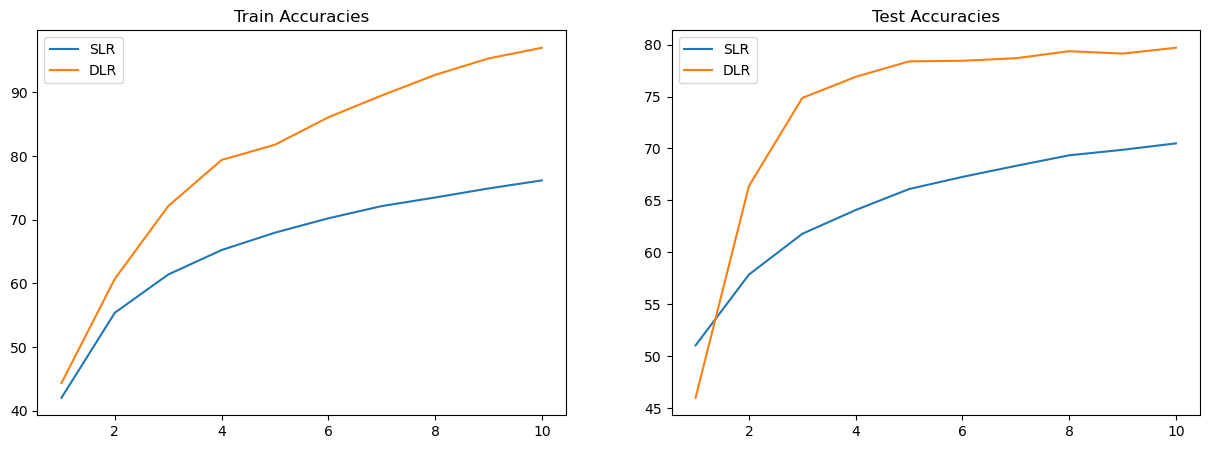

In [49]:
epoch_range = range(1, 11)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# plt.figure(211)
ax[0].plot(epoch_range, slr_op['train_acc'], label='SLR')
ax[0].plot(epoch_range, dlr_op['train_acc'], label='DLR')
ax[0].set_title("Train Accuracies")
ax[0].legend()
# ax[0].show()

# plt.figure(212)
ax[1].plot(epoch_range, slr_op['test_acc'], label='SLR')
ax[1].plot(epoch_range, dlr_op['test_acc'], label='DLR')
ax[1].set_title("Test Accuracies")
ax[1].legend()
# ax[1].show()